In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop(['CustomerID','Genre','Age'],axis=1,inplace=True)

In [6]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
df.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [59]:
narr=df.values

In [9]:
narr

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [61]:
#narr[1:5,0:4]

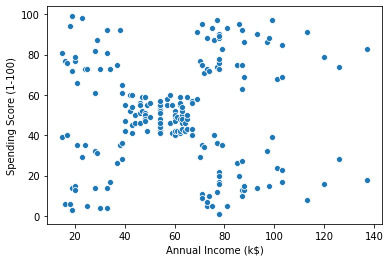

In [10]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

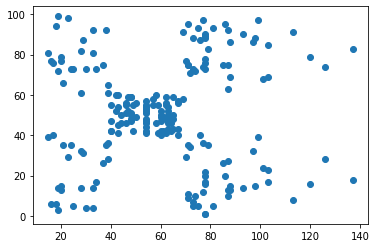

In [11]:
plt.scatter(narr[:,0],narr[:,1])

In [12]:
######WCSS::Within-Cluster-Sum-of-Squares

In [21]:
###### unsupervised model , only features , no lable(target)

In [13]:
from sklearn.cluster import KMeans

In [14]:
km=KMeans(n_clusters=1) #######n is number of clustors 

In [15]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
km.inertia_ #### inertia calculates WCSS value which is sum of square of distance of all points in clustor from centroid

269981.28

In [17]:
km=KMeans(n_clusters=200) #### with 200 clustors as there are total 200 points so total 200 centroid is formed means 200 point will have there
##own clustor so distance form self =0 so inertia =0

In [19]:
km.fit(df)

C:\Users\ajay gadhe\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (200). Possibly due to duplicate points in X.
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=200, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
km.inertia_ ######value must not be very high or zero

0.0

In [21]:

wcss_range=[]
for i in range (1,41):########taking 20% of total points to find wcss, thus range is 1 to 40
    km=KMeans(n_clusters=i)
    km.fit(df)
    wcss_range.append(km.inertia_)
    

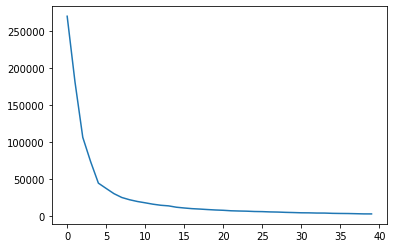

In [22]:
plt.plot(wcss_range) ######Elbow method to find number of clustors

In [23]:
wcss_range #### at n =5 clustor wcss drops drastically thus clustor =5 

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30227.606513152015,
 25062.433792653777,
 21996.523372372307,
 19657.783608703958,
 17873.33334132428,
 15991.032070707071,
 14560.734757431057,
 13727.949062049061,
 11904.04647313471,
 10874.728149043938,
 9975.5960255262,
 9419.521406861113,
 8755.068908964162,
 8178.473238917946,
 7766.733130105189,
 7104.164707961457,
 6797.978859617223,
 6570.760186502524,
 6133.584136153701,
 5964.086084581053,
 5572.5,
 5364.967532467533,
 4969.256729871437,
 4703.571171340736,
 4386.077579365079,
 4297.199386724386,
 4034.7694916194914,
 3996.2846139971143,
 3639.540584415584,
 3479.645779220779,
 3385.8687770562774,
 3152.68823953824,
 2906.7751443001443,
 2865.680266955267]

In [24]:
wcss_range=[]
for i in range (1,41):########taking 20% of total points to find wcss, thus range is 1 to 40
    km=KMeans(n_clusters=i,init='k-means++') 
    km.fit(df)
    wcss_range.append(km.inertia_)

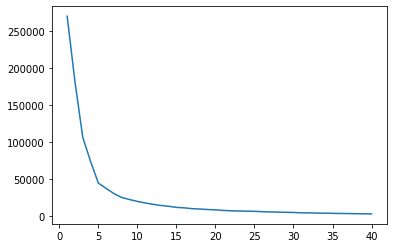

In [40]:
plt.plot(range(1,41),wcss_range)

In [32]:
km=KMeans(n_clusters=5,init='k-means++')

In [33]:
cluster=km.fit_predict(df)

In [34]:
df['cluster']=cluster

In [35]:
df

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,0
1,15,81,2
2,16,6,0
3,16,77,2
4,17,40,0
5,17,76,2
6,18,6,0
7,18,94,2
8,19,3,0
9,19,72,2


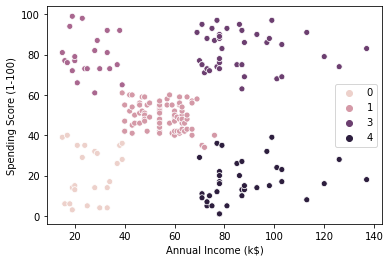

In [36]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,hue=cluster)

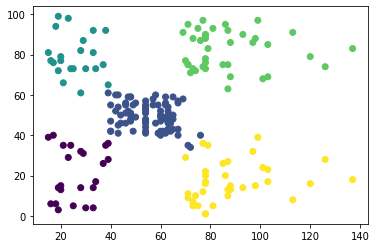

In [37]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=df['cluster'])

In [38]:
df['cluster']

0      0
1      2
2      0
3      2
4      0
5      2
6      0
7      2
8      0
9      2
10     0
11     2
12     0
13     2
14     0
15     2
16     0
17     2
18     0
19     2
20     0
21     2
22     0
23     2
24     0
25     2
26     0
27     2
28     0
29     2
      ..
170    4
171    3
172    4
173    3
174    4
175    3
176    4
177    3
178    4
179    3
180    4
181    3
182    4
183    3
184    4
185    3
186    4
187    3
188    4
189    3
190    4
191    3
192    4
193    3
194    4
195    3
196    4
197    3
198    4
199    3
Name: cluster, Length: 200, dtype: int32

In [39]:
df['cluster']==0    #####0,1,2,3,4 are five clustors

0       True
1      False
2       True
3      False
4       True
5      False
6       True
7      False
8       True
9      False
10      True
11     False
12      True
13     False
14      True
15     False
16      True
17     False
18      True
19     False
20      True
21     False
22      True
23     False
24      True
25     False
26      True
27     False
28      True
29     False
       ...  
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
188    False
189    False
190    False
191    False
192    False
193    False
194    False
195    False
196    False
197    False
198    False
199    False
Name: cluster, Length: 200, dtype: bool

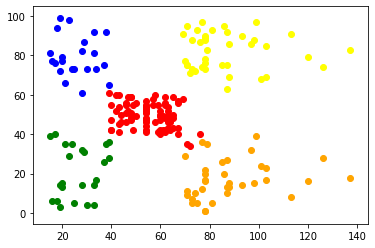

In [40]:
plt.scatter(narr[df['cluster']==0,0],narr[df['cluster']==0,1],color='green')
plt.scatter(narr[df['cluster']==1,0],narr[df['cluster']==1,1],color='red')
plt.scatter(narr[df['cluster']==2,0],narr[df['cluster']==2,1],color='blue')
plt.scatter(narr[df['cluster']==3,0],narr[df['cluster']==3,1],color='yellow')
plt.scatter(narr[df['cluster']==4,0],narr[df['cluster']==4,1],color='orange')

In [66]:
narr[df['cluster']==0,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)

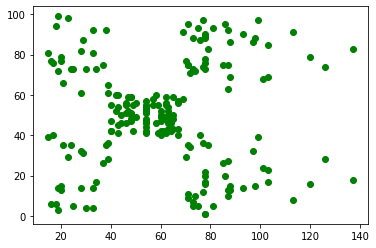

In [64]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='green')
# plt.scatter(df['Annual Income (k$)'] & df['cluster']==1 ,df['Spending Score (1-100)'] & df['cluster']==1,color='red')
# plt.scatter(df['Annual Income (k$)'] & df['cluster']==2 ,df['Spending Score (1-100)'] & df['cluster']==2,color='blue')
# plt.scatter(df['Annual Income (k$)'] & df['cluster']==3 ,df['Spending Score (1-100)'] & df['cluster']==3,color='orange')
# plt.scatter(df['Annual Income (k$)'] & df['cluster']==4 ,df['Spending Score (1-100)'] & df['cluster']==4,color='yellow')




In [42]:
df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,0
1,15,81,2
2,16,6,0
3,16,77,2
4,17,40,0


In [70]:
d={4:'LI, LS',1:'HI, HS',2:'LI, HS',0:'MI,MS',3:'HI,LS'}

In [71]:
df['cluster']=df['cluster'].map(d)

In [72]:
df #### cluster mapped to clustor groups of Medium income medium spending and likewise

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,"MI,MS"
1,15,81,"LI, HS"
2,16,6,"MI,MS"
3,16,77,"LI, HS"
4,17,40,"MI,MS"
5,17,76,"LI, HS"
6,18,6,"MI,MS"
7,18,94,"LI, HS"
8,19,3,"MI,MS"
9,19,72,"LI, HS"


In [58]:
km.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571]])